# Tarea 3: Estadística para Data Science



Se puede trabajar de manera individual o en grupos de máximo 4 personas.
Si trabajas en grupo, igualmente debes entregar en el buzón (o al correo v.landaeta@udd.cl si no tienes canvas) de manera individual con tu nombre y los nombres de los otros integrantes del grupo.


In [1]:
# Importando librerías

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
import seaborn as sns

## Datos Mineduc: rendimiento educacion básica y media 2021 en el Bío Bío.
Leamos el siguiente dataset

In [2]:
df_est = pd.read_csv("https://raw.githubusercontent.com/vmlandae/datasets_eds/main/clase5/rendimiento_2021_8va.csv")

Este dataset es un subconjunto de datos a nivel nacional del año 2021 facilitados por el mineduc en su [página de datos abiertos](https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/), donde reportan el rendimiento por alumno de enseñanza básica y media. Este dataset fue filtrado y limpiado, para solo contener los estudiantes que se encontraban matriculados en instituciones de la Región del Bío Bío. La [documentación](https://github.com/vmlandae/datasets_eds/blob/main/clase5/ER%20Rendimiento%20por%20alumno%2C%20bases%20Web.pdf) nos permite revisar que es cada variable, pues no todas son tan intuitivas. 

# 1.1: Revisa la documentación

1. ¿Cómo se llama la variable que tiene el promedio general del alumno? ¿Qué significa que su promedio sea 0?
2. ¿Cuál es el código para la provincia de Arauco? ¿En qué variable está ese código?
3. Si quiero filtrar solo a los estudiantes que estudian técnico en celulosa y papel, qué variable ocupo para ello?


In [3]:
df_est.columns.values

array(['Unnamed: 0', 'AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD',
       'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD',
       'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2',
       'RURAL_RBD', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO',
       'LET_CUR', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN',
       'GEN_ALU', 'FEC_NAC_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU',
       'NOM_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'SIT_FIN', 'SIT_FIN_R', 'COD_MEN'], dtype=object)

In [4]:
df_est['NOM_DEPROV_RBD'].head()

0    BIOBÍO
1    BIOBÍO
2    BIOBÍO
3    BIOBÍO
4    BIOBÍO
Name: NOM_DEPROV_RBD, dtype: object

### Respuestas 1.1

* 1.1.1 La variable se llama `PROM_GRAL`. Significa que el estudiante está retirado.
* 1.1.2 El código para la provincia de Arauco es `82`. Está en la variable `COD_PRO_RBD`
* 1.1.3 Ocupo la variable `COD_ESPE`, con el código `71004`.

In [5]:
# SIT_FIN_R es la situación a final de año de un estudiante,
# donde P: promovido, R: reprobado, Y: Retirado, T: trasladado (se cambió de colegio) y 
# algunos datos en blanco sin información. Vamos a filtrar para dejar solo P,R,Y en el dataset
# porque así estamos contando a cada alumno solo una vez (los que se cambian tienen más de un registro)

df =  df_est.loc[df_est['SIT_FIN_R'].isin(['P','R','Y'])].reset_index()

In [6]:
print(df_est['MRUN'].nunique())
print(df_est.shape)      
print(df['MRUN'].nunique())
print(df.shape)

274781
(280617, 38)
273894
(273894, 39)



## 2.1
Usa el atributo `.shape` del dataframe para saber cuantos casos hay en `df_est`, y cuantas variables tenemos. ¿Qué porcentaje del número de estudiantes de chile de básica y media del año 2021 son los estudiantes de la octava región?

## Respuesta

Al revisar la documentación, vemos que en la primera página aparece que el año 2021 hay 3237043 estudiantes en Chile en básica y media. 

In [7]:
# usando el número de filas en df_est.shape, el porcentaje se podría calcular haciendo
porcentaje_df_est_shape = 280617/3237043*100
# posiblemente es mejor usar el número de filas en df, ya que limpiamos los datos repetidos 
# y los que están sin información en su situación de final de año, luego

porcentaje_df_shape = 273894/3237043*100

print('Al calcular el porcentaje de estudiantes de Chile de educación básica y media que son de la octava región,',
      'usando el número de filas de df_est, el porcentaje es de un',porcentaje_df_est_shape,'%')
print('Al calcular el porcentaje de estudiantes de Chile de educación básica y media que son de la octava región,',
      'usando el número de filas de df_est, el porcentaje es de un',porcentaje_df_shape,'%')

Al calcular el porcentaje de estudiantes de Chile de educación básica y media que son de la octava región, usando el número de filas de df_est, el porcentaje es de un 8.668930255174244 %
Al calcular el porcentaje de estudiantes de Chile de educación básica y media que son de la octava región, usando el número de filas de df_est, el porcentaje es de un 8.461240706410141 %


La diferencia no es mucha.

## 2.2

La proporción de alumnos de básica y media en la región del Bío Bío el año 2021 que asistieron a un establecimiento rural, nos basta con calcularla usando el dataset. En este caso, la variable `RURAL_RBD` indica con `0` si el establecimiento es urbano y `1` si es rural.

1. Calcula la proporción de estudiantes de básica y media en la región del Bío Bío el año 2021 que al terminar el año asistían a un establecimiento rural.





In [8]:
# usamos df, que tiene los estudiantes en su situación de final de año.

prop_rural = df['RURAL_RBD'].mean()

print('La proporción de estudiantes de básica y media en la región del Bío Bío el año 2021 que al terminar el año asistían a un establecimiento rural es de un', prop_rural)

La proporción de estudiantes de básica y media en la región del Bío Bío el año 2021 que al terminar el año asistían a un establecimiento rural es de un 0.08037050829883094


2. La variable `NOM_COM_ALU` indica la comuna de residencia del alumno. ¿Cuál crees que será la comuna con mayor cantidad de alumnos?



In [9]:
# Acá cualquier comuna del Bío Bío es una respuesta válida, digamos Concepción. Veamos una tabla ordenada

df['NOM_COM_ALU'].value_counts().head(6)

LOS ÁNGELES            36598
CONCEPCIÓN             32764
SAN PEDRO DE LA PAZ    23411
TALCAHUANO             22733
CORONEL                21241
HUALPÉN                14177
Name: NOM_COM_ALU, dtype: int64

La mayor cantidad de alumnos tienen como comuna de residencia Los Ángeles.
Esto se explica ya que si bien el Gran Concepción es mucho más grande, como podemos ver en la tabla, en terminos de división comunal está dividida en varias comunas.

In [10]:
# solo para saber, que comunas tienen la mayor cantidad de estudiantes enrolados en las escuelas de esa comuna:
df['NOM_COM_RBD'].value_counts().head(6)

CONCEPCIÓN             42140
LOS ÁNGELES            41296
TALCAHUANO             22861
SAN PEDRO DE LA PAZ    22408
CORONEL                21973
CHIGUAYANTE            14636
Name: NOM_COM_RBD, dtype: int64

3. Crea un dataframe con las 6 comunas de más estudiantes, y denomínalo df_comunas_grandes, y otro dataframe que tenga el resto de la muestra y denomínalo df_otras_comunas



In [11]:
comunas_grandes = df['NOM_COM_ALU'].value_counts().index[0:6]
print(comunas_grandes)


Index(['LOS ÁNGELES', 'CONCEPCIÓN', 'SAN PEDRO DE LA PAZ', 'TALCAHUANO',
       'CORONEL', 'HUALPÉN'],
      dtype='object')


In [12]:
# creando df_comunas_grandes. Usamos el método isin, 
# el cual retorna True si la comuna está en la variable comunas_grandes
df_comunas_grandes = df[df['NOM_COM_ALU'].isin(comunas_grandes)]
# creando df_otras_comunas. Esto podríamos hacerlo de muchas formas, 
# lo hacemos con una negación al isin anterior, o sea, True si la comuna NO está en la variable comunas_grandes
df_otras_comunas = df[~df['NOM_COM_ALU'].isin(comunas_grandes)]


4. ¿Esperas que el porcentaje de alumnos rurales sea igual o distinto entre los dataframes? ¿Por qué?

**R:** Distinto, ya que los estudiantes que residen en las comunas más grandes de la octava región es mucho más probable que asistan a establecimientos urbanos en sus mismas comunas o en el área metropolitana en que se encuentran, en cambio df_otras_comunas incluye los estudiantes que residen en todas las comunas con mayor porcentaje de ruralidad, por ende uno debiera esperar que ese porcentaje fuera mayor.

5. Calcula la proporción de alumnos rurales y el promedio de notas en estos dos dataframes.

In [13]:
# proporción de estudiantes en establecimentos rurales

prop_rural_comunas_grandes = df_comunas_grandes['RURAL_RBD'].mean()
prop_rural_otras_comunas = df_otras_comunas['RURAL_RBD'].mean()

# promedio de notas
promedio_notas_comunas_grandes = df_comunas_grandes['PROM_GRAL'].mean()
promedio_notas_otras_comunas = df_otras_comunas['PROM_GRAL'].mean()

# para el promedio, probablemente sea buena idea sacar a los estudiantes retirados, con promedio = 0.

promedio_notas_comunas_grandes_sin_retirados = df_comunas_grandes[df_comunas_grandes['PROM_GRAL']>0]['PROM_GRAL'].mean()
promedio_notas_otras_comunas_sin_retirados = df_otras_comunas[df_otras_comunas['PROM_GRAL']>0]['PROM_GRAL'].mean()

# comparamos promedios con y sin retirados para ver cuanta diferencia hace:

print(' promedio con retirados comunas grandes:',round(promedio_notas_comunas_grandes,3) ,
     '\n promedio sin retirados comunas grandes:', round(promedio_notas_comunas_grandes_sin_retirados,3),
      '\n promedio con retirados otras comunas:', round(promedio_notas_otras_comunas,3) ,
     '\n promedio sin retirados otras comunas:', round(promedio_notas_otras_comunas_sin_retirados,3))

 promedio con retirados comunas grandes: 6.015 
 promedio sin retirados comunas grandes: 6.075 
 promedio con retirados otras comunas: 5.976 
 promedio sin retirados otras comunas: 6.05


In [14]:
print('La proporción de estudiantes que asistieron a establecimientos rurales al finalizar el año 2021',
      'y residen en las 6 comunas más frecuentes de la octava región es', round(prop_rural_comunas_grandes,3),
      'y la proporción de estudiantes que asistieron a establecimientos rurales al finalizar el año 2021 y no residen en estas seis comnas es de',
     round(prop_rural_otras_comunas,3))

print('El promedio de notas de los estudiantes que',
      'residen en las 6 comunas más frecuentes de la octava región el año 2021 es de', round(promedio_notas_comunas_grandes_sin_retirados,3),
      'y el promedio de los que no residen en estas seis comunas el año 2021 es de',
     round(promedio_notas_otras_comunas_sin_retirados,3))

La proporción de estudiantes que asistieron a establecimientos rurales al finalizar el año 2021 y residen en las 6 comunas más frecuentes de la octava región es 0.045 y la proporción de estudiantes que asistieron a establecimientos rurales al finalizar el año 2021 y no residen en estas seis comnas es de 0.124
El promedio de notas de los estudiantes que residen en las 6 comunas más frecuentes de la octava región el año 2021 es de 6.075 y el promedio de los que no residen en estas seis comunas el año 2021 es de 6.05


6. Dibuja un histograma con el promedio de notas para ambos dataframes

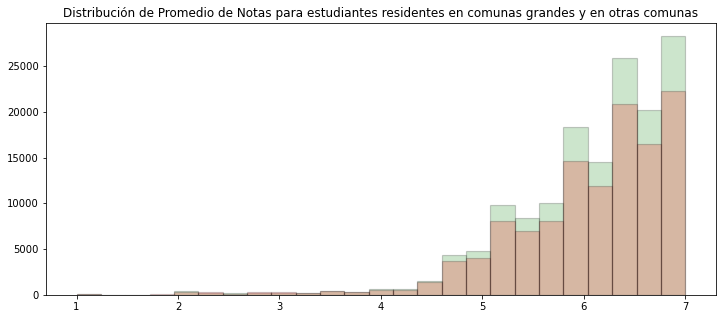

In [15]:
plt.rcParams['figure.figsize'] = (12,5)
plt.hist(df_comunas_grandes[df_comunas_grandes['PROM_GRAL']>0]['PROM_GRAL'],
         edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'green',alpha=0.2)
plt.hist(df_otras_comunas[df_otras_comunas['PROM_GRAL']>0]['PROM_GRAL'],
         edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'red',alpha=0.2)
plt.title("Distribución de Promedio de Notas para estudiantes residentes en comunas grandes y en otras comunas")
plt.show()

 ## 2.3 Letras del curso
 Veamos ahora la cantidad de estudiantes del dataframe en cursos con distinta letra
 1. Antes de correr la siguiente línea, ¿tienes alguna hipótesis de como va a ser esta distribución? Comenta:
 

**R:** Uno podría esperar que hayan más estudiantes en cursos con letra A, ya que los colegios empiezan a enumerar los cursos por esa letra, de manera secuencial siguiendo el abecedario. Entonces uno esperaría que los colegios/liceos grandes (con muchos niveles) tengan varias letras, hasta la E o más, que las instituciones de tamaño mediano tengan A,B y C, y que las instituciones pequeñas tengan solo A.

In [16]:
df['LET_CUR'].value_counts().head(15)

A     151518
B      73676
C      24000
D      10337
E       5649
F       3628
G       1822
H        952
I        641
S        254
J        228
L        165
P        146
AE       144
BE       140
Name: LET_CUR, dtype: int64

2. Crea 2 dataframes llamados df_A_samp y df_E_samp con un sampling de 300 sujetos sin reemplazo

### OJO 
La idea era que estos dataframes hubieran sido muestreos de estudiantes que están en cursos con la letra A y con la letra E respectivamente, pero la instrucción para ello no está explícita en las instrucciones, por tanto si los muestreos son aleatorios sobre df, igual cuentan como correctos. Acá lo haremos filtrando por letra

In [17]:
# La idea era que estos dataframes hubieran sido 
# muestreos de estudiantes que están en cursos con la letra A y con la letra E respectivamente,
# pero la instrucción no está explícita, por tanto si los muestreos son aleatorios sobre df, 
# igual cuentan como correctos. Acá lo haremos filtrando por letra

n=300

df_A_samp = df[df['LET_CUR']=="A"].sample(n)

df_E_samp = df[df['LET_CUR']=="E"].sample(n)

3. Calcula la proporción de estudiantes en establecimientos rurales para ambas muestras, y un intervalo de confianza al 95% para cada muestra, y responde si los intervalos se intersectan o no.

In [18]:


prop_est_rural_A = df_A_samp['RURAL_RBD'].mean()
prop_est_rural_E = df_E_samp['RURAL_RBD'].mean()

print(prop_est_rural_A)
print(prop_est_rural_E)

# chequear condiciones de exito/fracaso
# para A
print( n*prop_est_rural_A>10,n*(1-prop_est_rural_A)>10 )

# para E
print( n*prop_est_rural_E>10,n*(1-prop_est_rural_E)>10 )

# calcular error estándar
SE_est_rural_A = (prop_est_rural_A*(1-prop_est_rural_A)/n )**0.5
SE_est_rural_E = (prop_est_rural_E*(1-prop_est_rural_E)/n )**0.5



IC_rural_A = [prop_est_rural_A - 1.96* SE_est_rural_A , prop_est_rural_A + 1.96* SE_est_rural_A ]
IC_rural_E = [prop_est_rural_E - 1.96* SE_est_rural_E , prop_est_rural_E + 1.96* SE_est_rural_E ]

print(IC_rural_A)
print(IC_rural_E)

0.14
0.03666666666666667
True True
True True
[0.10073472102055898, 0.17926527897944106]
[0.015399019179705879, 0.05793431415362746]


Los intervalos NO se interesectan.

4. ¿Esperabas este resultado o algo diferente? Comenta

**R:** Esto podría haberse esperado, dado que como se mencionó antes, la letra A incluye estudiantes en establecimientos de todo tipo de tamaños, versus la letra E que solo incluye establecimientos grandes, los cuales uno podría esperar que estén más localizados en sectores urbanos que en sectores rurales.
